In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from matplotlib.axes import Axes

In [5]:
def load_data(path):
    p = Path(path)
    vel = np.load(p/"vel.npy")
    vel_time = np.load(p/"vel_time.npy")
    den = np.load(p/"den.npy")
    den_time = np.load(p/"den_time.npy")
    
    return vel, den, vel_time, den_time

def get_conv_arr(arr, kernel_size):
    num_points = arr.size - kernel_size
    new_arr = np.zeros(num_points, dtype=arr.dtype)
    for i in range(num_points):
        new_arr[i] = arr[i:i+kernel_size].sum()
    
    return new_arr

def get_sum_arr(arr, kernel_size):
    from math import floor

    num_points = arr.size // kernel_size
    new_arr = np.zeros(num_points, dtype=arr.dtype)
    start_id = 0
    for i in range(num_points):
        end_id = start_id + kernel_size 
        new_arr[i] = arr[start_id:end_id].sum()
        start_id = end_id 
    
    return new_arr

In [6]:
path = "data/adh_3/den_vel/data"
vel, den, vel_time, den_time = load_data(path)


import yaml
from pathlib import Path
with open(Path(path)/"den_vel_metadata.yaml") as f:
    metadata = yaml.unsafe_load(f)

den = den * metadata["density_eq"] / 50

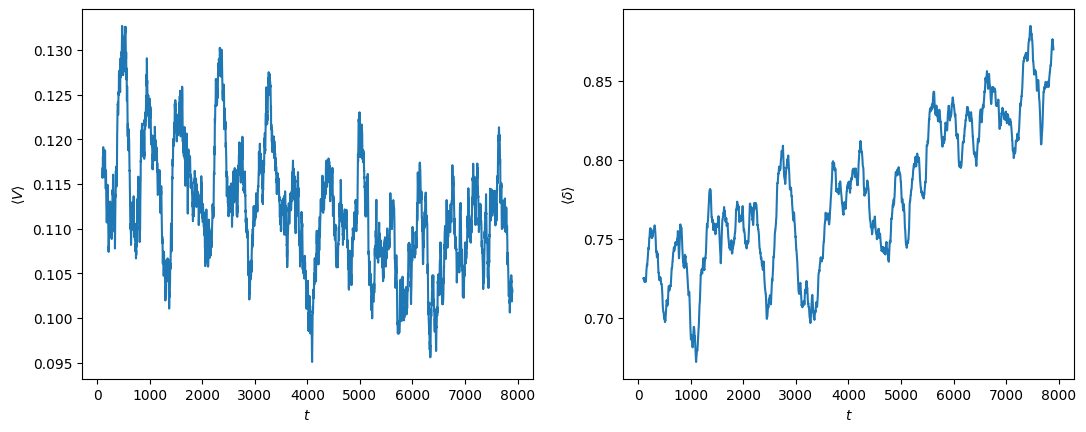

In [7]:
kernel_size = 100

vel_conv = get_conv_arr(vel, kernel_size)/kernel_size
vel_t_conv = get_conv_arr(vel_time, kernel_size)/kernel_size

den_conv = get_conv_arr(den, kernel_size)/kernel_size
den_t_conv = get_conv_arr(den_time, kernel_size)/kernel_size

fig, ax = plt.subplots(1, 2)
ax: list[Axes]

w, h = fig.get_size_inches()
fig.set_size_inches(2*w, h)

ax[0].set_xlabel("$t$")
ax[0].set_ylabel("$\\langle V \\rangle$")

ax[1].set_xlabel("$t$")
ax[1].set_ylabel("$\\langle \\delta \\rangle$")


ax[0].plot(vel_t_conv, vel_conv)
ax[1].plot(den_t_conv, den_conv)

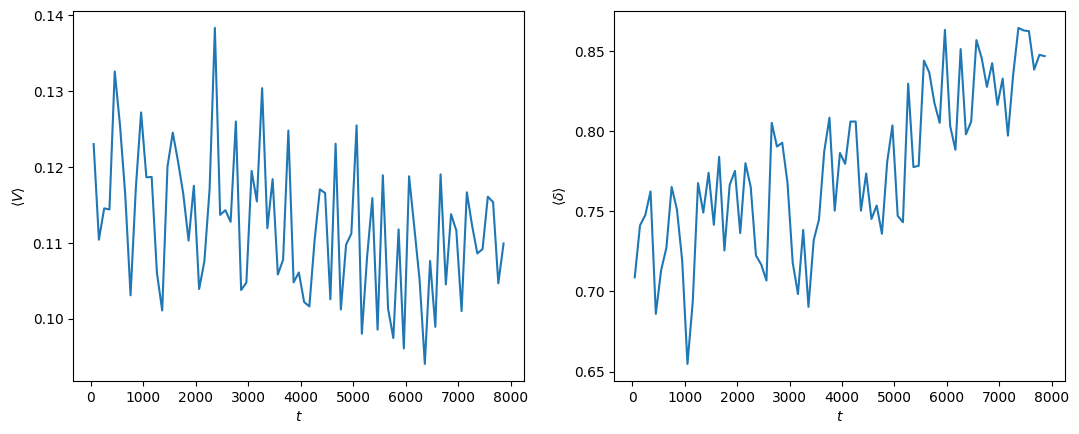

In [8]:
kernel_size = 50

vel_conv = get_sum_arr(vel, kernel_size)/kernel_size
vel_t_conv = get_sum_arr(vel_time, kernel_size)/kernel_size

den_conv = get_sum_arr(den, kernel_size)/kernel_size
den_t_conv = get_sum_arr(den_time, kernel_size)/kernel_size

fig, ax = plt.subplots(1, 2)
ax: list[Axes]

w, h = fig.get_size_inches()
fig.set_size_inches(2*w, h)

ax[0].set_xlabel("$t$")
ax[0].set_ylabel("$\\langle V \\rangle$")

ax[1].set_xlabel("$t$")
ax[1].set_ylabel("$\\langle \\delta \\rangle$")


ax[0].plot(vel_t_conv, vel_conv)
ax[1].plot(den_t_conv, den_conv)